In [5]:
#Check folder
import os

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
# enable plotting with jupyter
%matplotlib inline

In [7]:
#Check the correct folder
print(os.getcwd())
#this should be run only if necessary
#os.listdir(os.curdir)
#os.chdir('data')

df = pd.read_pickle('step1_df.pk')
df.head()

/Users/mpietro/projects/manning/resume-job-posting-nlp-project


,title,body,bullets
0,"Quantitative Analyst - Boston, MA 02116","Quantitative Analyst - Boston, MA 02116\nQuant...",()
1,"Data Scientist - Mountain View, CA","Data Scientist - Mountain View, CA\nGroundTrut...","(Help senior members of the team to explore, d..."
2,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nA Bachelor or Ma...",(A Bachelor or Masters Degree in a highly quan...
3,Senior Natural Language Processing (NLP) Engin...,Senior Natural Language Processing (NLP) Engin...,(Join a small team creating a proprietary NLU ...
4,"FLEXO FOLDER GLUER OPER - McClellan, CA - McCl...","FLEXO FOLDER GLUER OPER - McClellan, CA - McCl...",()


In [9]:
try:
    with open('Liveproject Resume.txt', 'r') as f:
        resume = f.read()
except:
    import inspect
    resume = inspect.cleandoc("""Good Student
        Data Scientist
        
        Good Student
        
        123 Fake Street
        Some City, QT 12345
        123.456.7890
        
        no_reply@fakesite.com
        Skills
        Python, Pandas, machine learning, natural language processing
        
        Experience
        
        Manning / Data Analyst
        Oct 2019 - PRESENT, REMOTE
        Analyzed and visualized vast amounts of data using Pandas,Python, and Matplotlib.

        Education
        
        Berkeley / B.S. Mathematics
        August 2015 - May 2019, BERKELEY, CA
        Graduated summa cum laude.

        Awards
        
        Tau Beta Pi Honors Society""")


In [10]:
resume_dict = {'title': 'resume', 'body': resume, 'bullets': ''}

In [11]:
df_with_resume = df.append(pd.DataFrame(resume_dict, index=[0]))

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')
transformed_docs = vectorizer.fit_transform(df_with_resume['body'])

In [13]:
type(transformed_docs)

scipy.sparse.csr.csr_matrix

In [14]:
tfidf_jobs = transformed_docs[:-1, :]

In [15]:
tfidf_resume = transformed_docs[-1, :]

In [16]:
df_with_resume.shape

(1329, 3)

In [17]:
transformed_docs.shape

(1329, 19015)

In [18]:
tfidf_jobs.shape

(1328, 19015)

In [19]:
cos_sims = cosine_similarity(tfidf_jobs, tfidf_resume)

In [20]:
cos_sims.shape

(1328, 1)

In [21]:
sorted_df = df.copy()
sorted_df['cosine_similarity'] = cos_sims

In [22]:
sorted_df.sort_values(by='cosine_similarity', ascending=False, inplace=True)
# this resets the index
sorted_df.reset_index(inplace=True, drop=True)

sorted_df.head()

,title,body,bullets,cosine_similarity
0,Institutional Data and Research Analyst (6948U...,Institutional Data and Research Analyst (6948U...,(),0.143349
1,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.125523
2,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.121162
3,"Data Analyst (6256U) 1737 - 1737 - Berkeley, C...","Data Analyst (6256U) 1737 - 1737 - Berkeley, C...",(),0.117481
4,Senior Data Systems Analyst (0599U) - 1668 - 1...,Senior Data Systems Analyst (0599U) - 1668 - 1...,(),0.113083


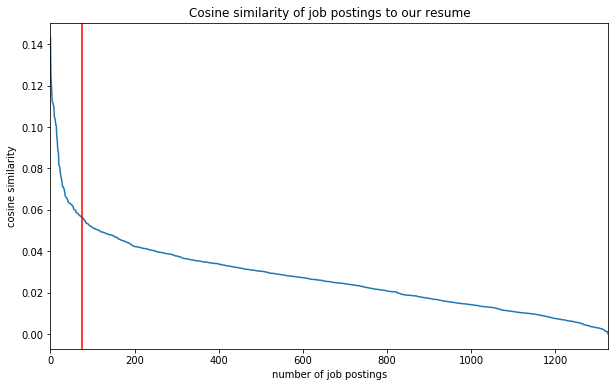

In [23]:
# change the shape of the plot to fill the page a little better
plt.figure(figsize=(10, 6))
sorted_df['cosine_similarity'].plot()
plt.title('Cosine similarity of job postings to our resume')
plt.xlabel('number of job postings')
plt.ylabel('cosine similarity')
# add a vertical red line at the x value of 100
# sending the output of our last plt command to the underscore prevents it from printing text
_ = plt.axvline(75, c='r')